<a href="https://colab.research.google.com/github/GannojiSathvik/tensorflow/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


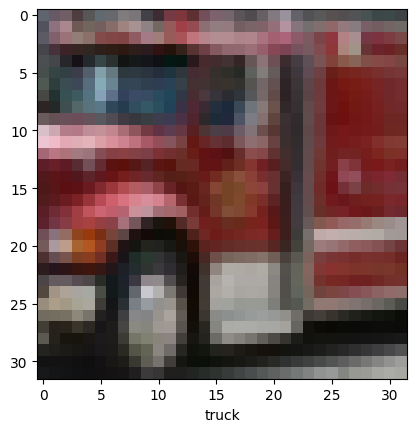

In [21]:
# Let's look at a one image
IMG_INDEX = 88  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32,(2,2),activation = 'relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(2,2),activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(2,2),activation = 'relu'))
model.add(layers.MaxPool2D(2,2))


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3438 - loss: 1.7612 - val_accuracy: 0.5357 - val_loss: 1.2736
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.5697 - loss: 1.2130 - val_accuracy: 0.6034 - val_loss: 1.1119
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6375 - loss: 1.0269 - val_accuracy: 0.6434 - val_loss: 1.0188
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6708 - loss: 0.9329 - val_accuracy: 0.6746 - val_loss: 0.9259


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[0])])



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
horse


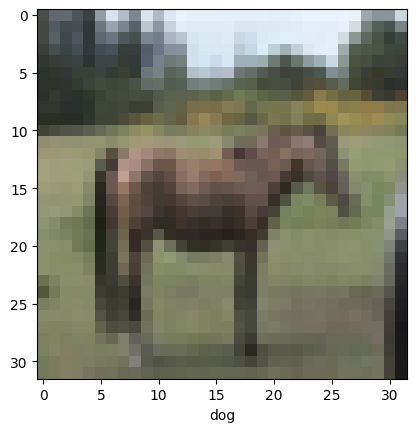

In [24]:
img = 9999

prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[img])])

  # change this to look at other images

plt.imshow(test_images[img] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img][0]])
plt.show()